### Import modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Read Image Function

In [2]:
def Read_img(path):
    img= open(path,"r")
    g= img.readline()
    c= img.readline()
    rc= img.readline()
    max= int(img.readline())
    
    [col,row]=[int (i) for i in rc.split()]
    k=np.zeros((row,col),np.int64)  #Arry to store all image pixels
    for i in range (row):
        for j in range(col):
            k[i,j]=img.readline()
    
    img.close()
    plt.imshow(k,cmap='gray')
    return k,g,c,rc,max,col,row

### Store/Write O/p Image Function

In [3]:
def Write_img(path,k,g,c,rc,max,col,row):
    img= open(path,"w")
    img.write(g)
    img.write(c)
    img.write(rc)
    img.write(str(max)+"\n")
    
    for i in range(row):
        for j in range(col):
            img.write("%d\n"%k[i,j])
    plt.imshow(k,cmap='gray')
    img.close()

### Function used for padding

In [4]:
def add_padding(arr,row,col,k_row,k_col):
    r_pd_size= (k_row-1)//2
    c_pd_size= (k_col-1)//2
    n_row=row+r_pd_size*2
    n_col=col+c_pd_size*2
    new_arr= np.zeros((n_row,n_col),np.int64)
    for i in range(r_pd_size,row+r_pd_size):
        for j in range(c_pd_size,col+c_pd_size):
            new_arr[i,j]=arr[i-r_pd_size,j-c_pd_size]
    return new_arr,n_row,n_col

### Median filter

In [5]:
def median_filter(arr,row,col,f_size):

    padded_img,n_row,n_col= add_padding(arr,row,col,f_size,f_size)
    result= np.zeros((row,col),np.int64)  #Arry to store all image pixels after convolutation

    for i in range(row):
        for j in range(col):
            # neighbourhood= padded_img[max(0,i-f_size):min(row,i+f_size), max(0,j-f_size):min(col,j+f_size)]
            neighbourhood= padded_img[i:f_size+i, j:f_size+j]
            result[i,j]=int(np.median(neighbourhood))

    return result

### Generate Noise

In [6]:
def generate_noise(arr,row,col,z):
    rm=np.random.randint(z+1,size=(row,col))
    print(rm)
    result=arr
    for i in range(row):
        for j in range(col):
            if(rm[i,j]==z):
                result[i,j]=255
            if(rm[i,j])==0:
                result[i,j]=0
    return result

### Main Function

[[4 2 4 ... 6 6 1]
 [1 0 4 ... 2 4 6]
 [3 4 4 ... 3 1 1]
 ...
 [1 6 4 ... 2 0 1]
 [4 1 0 ... 5 1 5]
 [2 3 0 ... 2 5 0]]


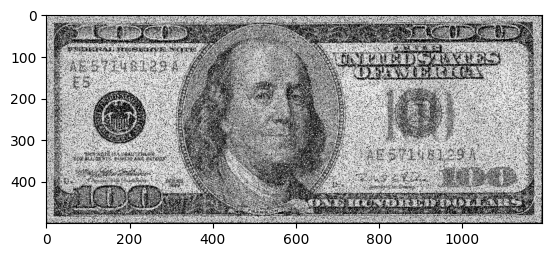

In [7]:
if __name__ == '__main__':
    
    k1,g1,c1,rc1,max1,col1,row1= Read_img("..\images\DIP3E_Original_Images_CH03\Fig0314(a)(100-dollars).pgm")
    
    # f= int(input("\nEnter filter size= "))
    result=generate_noise(k1,row1,col1,6)
    Write_img("outputs\\noisy_img.pgm",result,g1,c1,rc1,max1,col1,row1)

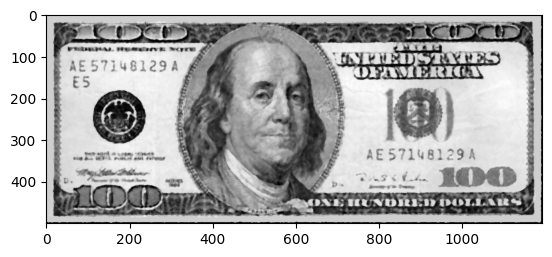

In [8]:
result=median_filter(result,row1,col1,6)
Write_img("outputs\\noise_removed_img.pgm",result,g1,c1,rc1,max1,col1,row1)